

# Custom Dataset




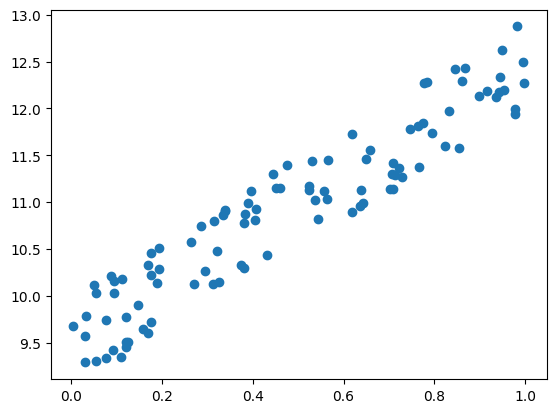

In [167]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X = np.random.rand(100,1)
y = 9 + 3*X.ravel() + np.random.rand(100)

df = pd.DataFrame(np.column_stack((X,y)),columns=['abc', 'defo'])

df.head()

plt.scatter(X,y)



# Making and fitting the model

In [201]:
def loss_function(m,b,points,x_rows,y_rows):
  error = 0
  for i in range(len(points)):
    x = points.iloc[i][x_rows]
    y = points.iloc[i][y_rows]

    error+=(y - (m*x+b))**2

  error = error/float(len(points))

  return error



def gradient_ascent(m_now,b_now , points , L,x_rows,y_rows):
  m_gradient = 0
  b_graident = 0

  n = len(points)

  for i in range(n):

    x = points.iloc[i][x_rows]
    y = points.iloc[i][y_rows]

    m_gradient += (-2/n)*(y-(m_now*x + b_now))*x
    b_graident += (-2/n)*(y-(m_now*x + b_now))

  m  = m_now - m_gradient * L
  b = b_now - b_graident * L

  return m,b



def predict(m,x,b):
  return m*x+b

def model_start(df,x_rows,y_rows):
  m = 0
  b= 0
  L = 0.001

  epochs = 250


  for i in range(epochs):
    m,b = gradient_ascent(m,b,df,L,x_rows,y_rows)




  print(f" m is {m}  and b is {b}")

  return m,b






# print(loss_function(m,b,df))

# plt.scatter(df.abc,df.defo)
# axis = plt.twinx()
# axis.plot(list(range(20,80)),[m*x + b for x in range(20,80)],color = 'red')

# Testing our model on new Dataset

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_2 = pd.read_csv("/content/score.csv")



model_2 = model_start(df_2,'Hours','Scores')


df_3 = pd.read_csv("/content/score_updated.csv")

prediction = predict(model_2[0],df_3['Hours'],model_2[1])

print(f"The total error mean squared lost is {loss_function(model_2[0],model_2[1],df_3,'Hours','Scores')}")




 m is 9.905306423755318  and b is 1.6813754178175104
The total error mean squared lost is 11.566292535572877


0     26.443042
1     52.302035
2     33.405079
3     86.117641
4     36.388809
        ...    
91    59.264072
92    45.339999
93    62.247802
94    38.377962
95    81.144758
Name: Hours, Length: 96, dtype: float64
